/home/cordell/anaconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


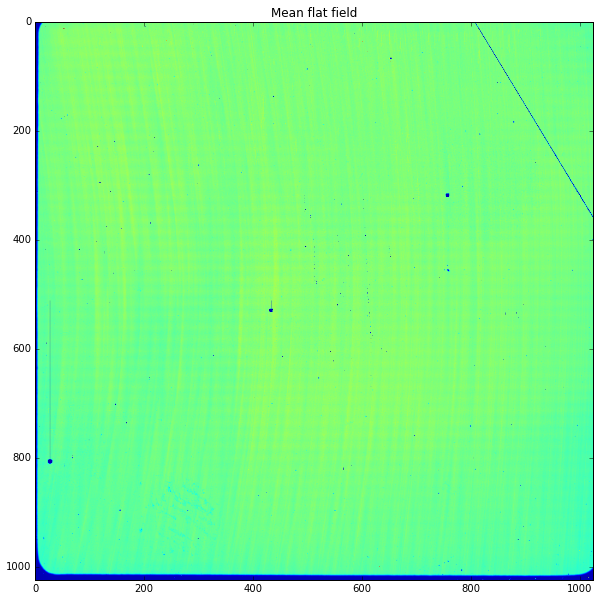

In [1]:
"""
Cordell Newmiller
Prof. Fassnacht
PHY 266
Homework 2
Problem 4

A standard part of ground-based optical and near-infrared
observations is the correction for pixel-to-pixel sensitivity variations in the detector.
This correction is determined by (as much as possible) uniformly illuminating the detector, so
that every pixel receives the same number of photons on average. Thus, variations in the output
data are just due to the difference in sensitivity of the pixels and, of course, statistical noise. In
this problem, you will create a flat-field file.

On the course smartsite, in Resources → Homework → Data, you will find 5 J-band flat-field
exposures obtained with the Gemini Telescope and the NIRI detector. These files are called
gemflat*.fits. To create the flat-field you will combine these five two-dimensional data sets by
taking the mean to create a final two-dimensional data set (similar to what you did with the
bias frames in HW1). However, because the average photon rate can be slightly different from
exposure to exposure (especially true if you are using the twilight sky to determine your flat-
field corrections), you need to divide each input file by its median data value before
averaging the files together. Submit your code for doing this, as well as a plot of your final
combined flat-field image (as a png file).
"""

import numpy
from matplotlib import pyplot
from astropy.io import fits
get_ipython().magic('matplotlib inline')

# Assumes the gemflat files are in the working directory
gemflat352fits=fits.open('gemflat352.fits')
gemflat353fits=fits.open('gemflat353.fits')
gemflat354fits=fits.open('gemflat354.fits')
gemflat355fits=fits.open('gemflat355.fits')
gemflat356fits=fits.open('gemflat356.fits')

# Load the data into a 3D array, one set of flat data for each layer
x,y=gemflat352fits[0].data.shape
gemflat=numpy.zeros((x,y,5))
gemflat[:,:,0]=gemflat352fits[0].data
gemflat[:,:,1]=gemflat353fits[0].data
gemflat[:,:,2]=gemflat354fits[0].data
gemflat[:,:,3]=gemflat355fits[0].data
gemflat[:,:,4]=gemflat356fits[0].data

normalizedgemflat=numpy.zeros(gemflat.shape)
# Divide each layer by its median
for i in range(0,5):
    normalizedgemflat[:,:,i]=gemflat[:,:,i] / numpy.median(gemflat[:,:,i])

# Average the flat fields into a single 2D array
meanflat=normalizedgemflat.mean(axis=2)

# Plot and save the resulting flat field
figure1 = pyplot.figure(figsize=(10,10))
pyplot.imshow(meanflat)
pyplot.title('Mean flat field')
pyplot.savefig('CJNhw02p4result.png')

# End of problem 4
